<a href="https://colab.research.google.com/github/arica-ee/CNN-cifar10/blob/main/%5BCNN%5D_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入資料集

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [17]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
# # 下載中文字型
# # 增加繁體中文字型
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download # 下載字型並移動到指定路徑

# import matplotlib

# matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# matplotlib.rcParams["font.family"] = ['Taipei Sans TC Beta']

train_set:


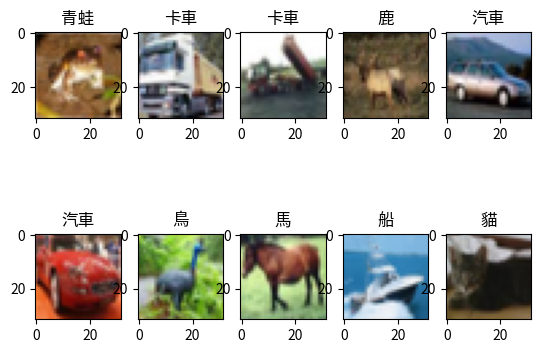

In [18]:
# 印出前十筆訓練資料
import matplotlib.pyplot as plt
className = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]
print("train_set:")
for i in range(0, 10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(className[y_train[i, 0]])
plt.show()

# 資料前處理

In [5]:
import numpy as np
import tensorflow as tf

np.random.seed(100)
tf.random.set_seed(100)

In [6]:
# 把y轉換為onehot型態（方便神經網路輸入）
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 處理訓練集/驗證集
train_datagen = ImageDataGenerator(
    rescale=1.0/255, # 把像素縮放至0~1
    shear_range=3, # 切變（沿x軸/y軸拉伸圖片）
    zoom_range=0.1, # 縮放
    horizontal_flip=True # 隨機上下翻轉圖片
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255
)

### 分割資料集為 NumPy 陣列
split_index = int(len(x_train) * 0.75)  # 前75%訓練集, 後25%驗證集
x_train_split, x_val_split = x_train[:split_index], x_train[split_index:]
y_train_split, y_val_split = y_train[:split_index], y_train[split_index:]

### 創建訓練集和驗證集
train_set = train_datagen.flow(x_train_split, y_train_split, batch_size=10)
validation_set = val_datagen.flow(x_val_split, y_val_split, batch_size=10)

In [8]:
# 處理測試集
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

test_set = test_datagen.flow(
    x_test, y_test,
    batch_size = 10,
    shuffle=False
)

# 建置模型

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input

# CNN模型
model = Sequential()

# 輸入層
model.add(Input(shape = [32, 32, 3]))

# 第一隱藏層 ＆ 最大池化
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

# 第二隱藏層 ＆ 最大池化
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

# 第三隱藏層 ＆ 最大池化
model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

# 展平層
model.add(layers.Flatten())

# 全連接層
model.add(layers.Dense(units = 512, activation = "relu"))

# 輸出層
model.add(layers.Dense(units = 10, activation = "softmax"))

model.compile(optimizer = "nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,473,610 (9.44 MB)

 Trainable params: 2,473,610 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(train_set, validation_data = validation_set, batch_size = 10, epochs = 10)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - accuracy: 0.3928 - loss: 1.6483 - val_accuracy: 0.5600 - val_loss: 1.2745
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.5926 - loss: 1.1392 - val_accuracy: 0.6538 - val_loss: 0.9963
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.6567 - loss: 0.9782 - val_accuracy: 0.6783 - val_loss: 0.9465
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.6847 - loss: 0.8975 - val_accuracy: 0.6951 - val_loss: 0.8709
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7073 - loss: 0.8354 - val_accuracy: 0.6858 - val_loss: 0.9019
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7178 - loss: 0.8028 - val_accuracy: 0.7018 - val_loss: 0.8696
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7308 - loss: 0.7677 - val_accuracy: 0.7226 - val_loss: 0.8010
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.7445 - loss

In [11]:
test_loss, test_acc = model.evaluate(test_set)
print(f"準確率為：{round(test_acc, 2)}")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7117 - loss: 0.8371
準確率為：0.71


# 抽取測試集的前十筆資料呈現模型預測結果

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
test_set:


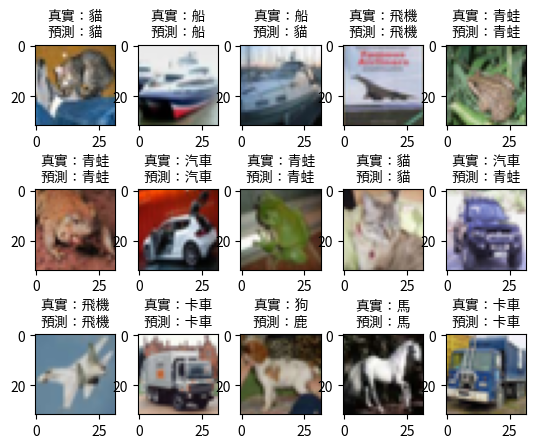

In [16]:
y_pred = model.predict(test_set)

y_test_org = np.argmax(y_test, axis = 1)
y_pred_org = np.argmax(y_pred, axis = 1)

print("test_set:")
for i in range(0, 15):
  plt.subplot(3, 5, i+1)
  plt.imshow(x_test[i])
  plt.title(f"真實：{className[y_test_org[i]]}\n預測：{className[y_pred_org[i]]}", fontsize=10)
plt.subplots_adjust(hspace=0.8)
plt.show()